In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(
    '../data/processed/job_offers.csv',
    sep=';',
    encoding='UTF-8')
df.head()

,name,company,technology,job,location_city,location_country,salary_low,salary_high,salary_currency,salary,salary_avg,is_senior
0,business analyst/senior business analyst,SoftServe,NaN,data analyst,zdalna,B/D,11000.0,21500.0,PLN,NaN,16250.0,0
1,power bi developer / data analyst,Objectivity,NaN,data analyst,zdalna,B/D,14000.0,20000.0,PLN,NaN,17000.0,0
2,junior data analyst,Coinfirm,NaN,data analyst,zdalna,B/D,3100.0,5000.0,PLN,NaN,4050.0,0
3,data analyst,Packhelp,NaN,data analyst,warszawa,POL,13000.0,15000.0,PLN,NaN,14000.0,0
4,data analyst (analityk danych),Alterdata.io sp. z o.o.,NaN,data analyst,zdalna,B/D,12000.0,18000.0,PLN,NaN,15000.0,0


job
data analyst      28
data engineer     95
data scientist    25
dtype: int64


<AxesSubplot:xlabel='job'>

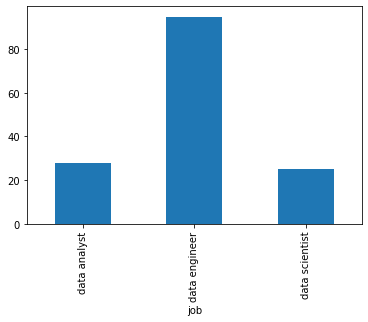

In [3]:
job_offers = df.groupby(by=['job']).size()

print(job_offers)
job_offers.plot.bar()

location_city  job           
budapest       data engineer      4
               data scientist     1
gdańsk         data engineer      1
krakow         data engineer      1
kraków         data analyst       1
               data engineer      1
malbork        data engineer      1
poznań         data engineer      3
sopot          data scientist     1
warszawa       data analyst       6
               data engineer      7
               data scientist     6
wroclaw        data engineer      1
               data scientist     1
zdalna         data analyst      21
               data engineer     76
               data scientist    15
łódź           data scientist     1
dtype: int64


<AxesSubplot:xlabel='location_city,job'>

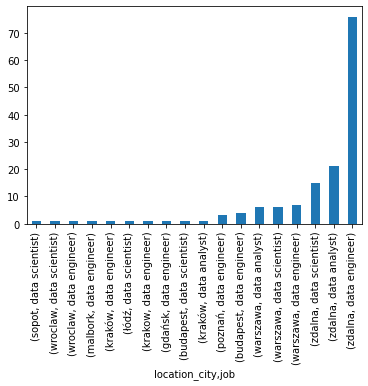

In [4]:
offers_by_city = df.groupby(by=['location_city', 'job']).size()

print(offers_by_city)
offers_by_city.sort_values().plot.bar()

                  salary_avg  count
job                                
data analyst    14566.696429     28
data scientist  17895.940000     25
data engineer   20741.005263     95


array([[<AxesSubplot:title={'center':'salary_avg'}, xlabel='job'>,
        <AxesSubplot:title={'center':'count'}, xlabel='job'>]],
      dtype=object)

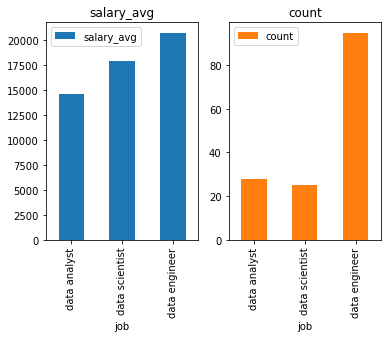

In [5]:
offer_salary = df.groupby(by=['job']).agg({'salary_avg': 'mean', 'name': 'count'})
offer_salary.sort_values(by=['salary_avg'], inplace=True)
offer_salary.rename(columns={'name':'count'}, inplace=True)

print(offer_salary)
offer_salary.plot(subplots=True, layout=(1, 2), kind='bar')

In [6]:
offer_salary_by_city = df.groupby(by=['location_city']).agg({'salary_avg': 'mean', 'name': 'count'})
offer_salary_by_city.sort_values(by=['salary_avg'], inplace=True)
offer_salary_by_city.rename(columns={'name':'count'}, inplace=True)

offer_salary_by_city

,salary_avg,count
location_city,,
malbork,5500.000000,1
sopot,9750.000000,1
łódź,12000.000000,1
budapest,13449.800000,5
poznań,13500.000000,3
warszawa,14421.052632,19
kraków,16000.000000,2
krakow,16500.000000,1
wroclaw,20160.000000,2


<AxesSubplot:xlabel='location_city'>

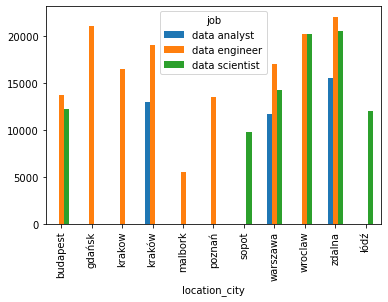

In [7]:
df.pivot_table(index='location_city', columns='job', values='salary_avg').plot(kind='bar')

In [8]:
salary_by_senior = df.groupby(by=['job', 'is_senior']).agg({'salary_avg': 'mean', 'name': 'count'})
salary_by_senior

salary_avg  name
job            is_senior                    
data analyst   0          14085.288462    26
               1          20825.000000     2
data engineer  0          19912.444444    81
               1          25534.821429    14
data scientist 0          16537.131579    19
               1          22198.833333     6